In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import pandas_profiling as pp
import matplotlib.pyplot as plt
import os
import sys
import csv

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sb.set_style('darkgrid')
sb.set(font_scale = 1.5)

In [2]:
df = pd.read_csv("D:\Open Classroom\Data Files\Data Visualization\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 10 Patch objects>)

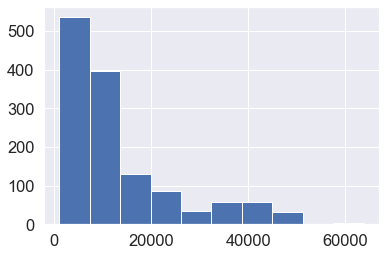

In [3]:
plt.hist(df["charges"])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
round(df.describe(include = "all"), -1)

,age,sex,bmi,children,smoker,region,charges
count,1340.0,1338,1340.0,1340.0,1338,1338,1340.0
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,40.0,NaN,30.0,0.0,NaN,NaN,13270.0
std,10.0,NaN,10.0,0.0,NaN,NaN,12110.0
min,20.0,NaN,20.0,0.0,NaN,NaN,1120.0
25%,30.0,NaN,30.0,0.0,NaN,NaN,4740.0
50%,40.0,NaN,30.0,0.0,NaN,NaN,9380.0
75%,50.0,NaN,30.0,0.0,NaN,NaN,16640.0


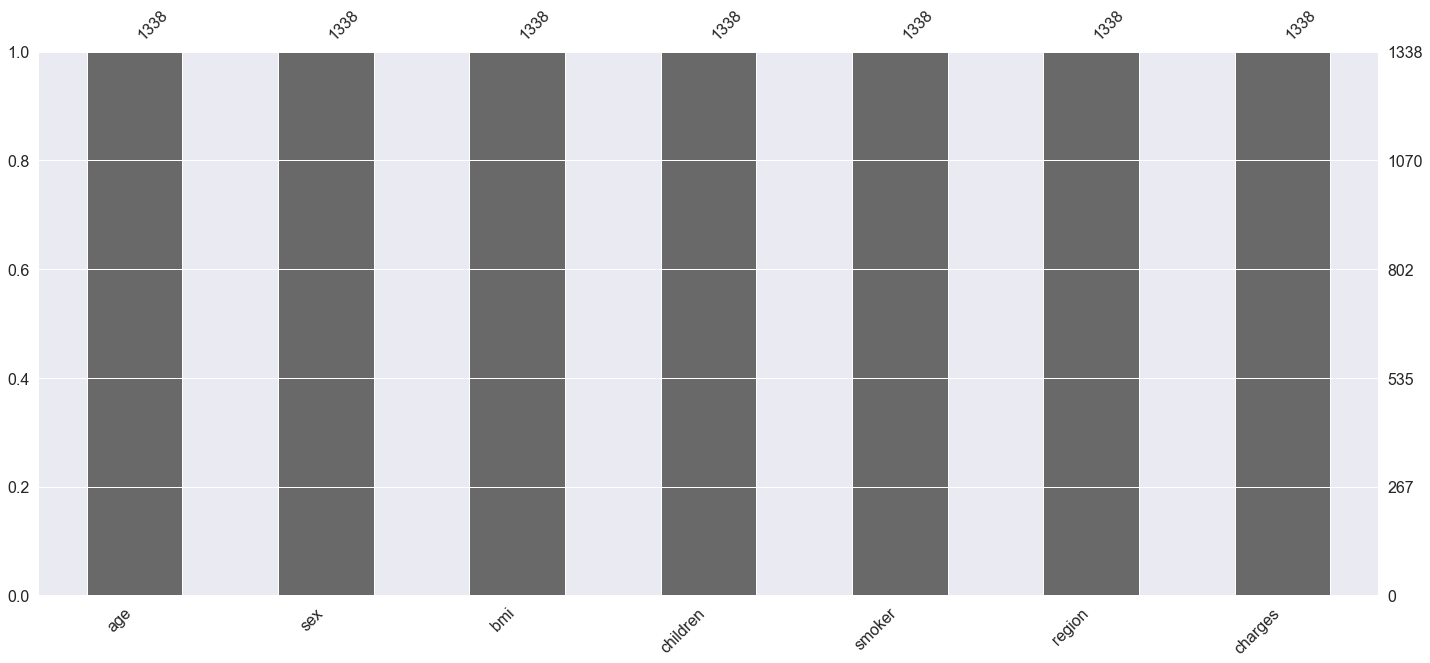

In [6]:
msno.bar(df)

In [7]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
X = df[["sex", "bmi", "smoker"]]
y = df["children"]

le = LabelEncoder()
X = X.apply(le.fit_transform)

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

model.fit(X_train, y_train)

target = model.predict(X_test)
target

array([0, 0, 5, 0, 0, 2, 0, 2, 0, 1, 1, 3, 0, 0, 2, 1, 0, 1, 1, 0, 5, 0,
       0, 3, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 5, 0, 0, 1, 3, 2, 5, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       3, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 5, 3, 0, 0, 0, 0, 0, 0, 1, 3,
       1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 4, 1, 0, 3, 1, 2, 2, 0, 0, 0, 4, 2,
       1, 0, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1,
       1, 2, 3, 0, 0, 0, 2, 3, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1,
       3, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 0, 1, 0, 2, 1, 1, 3, 0, 0,
       2, 3, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 2, 4, 1, 1, 3, 3, 0, 2, 0, 3, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 3, 0, 2, 0, 0, 1, 5, 2, 0, 0, 2, 0, 1,

In [12]:
# Accuracy Score
score = accuracy_score(y_test, target)
print(f"Accuracy Score : {round(score*100)} %")


Accuracy Score : 32.0 %


In [14]:
X.head()

,sex,bmi,smoker
0,0,197,1
1,1,350,0
2,1,331,0
3,1,73,0
4,1,223,0


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
